# Métodos de agrupamiento para Genes de cancer (Bionformática)

In [1]:
# Data structure and plots
import numpy as np
import pandas as pd
import time

# Preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA  # Dimensionality reduction

# GRaphics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (12, 12)

El objetivo es explorar la nivel de especies de unas cuantas especies microbianas basados en los datos de secuencia. El resultado será determinar si las muestras (secuencias) de las misma especie son similares

Se cargarán 5 secuencias anotadas de cada especie la base de datos 16S rRNA desde la base de datos de Greengenes

La salida es seq_data que contiene la etiquetas de clase y el tamaño de clases, a través del siguiente método (load_annotated_sequences)

# Import Dataset Function

In [2]:
def importdata():
    df = pd.read_csv(
"Datasets/TCGA-PANCAN-Hiseq-198x200(801x20531).csv",
    index_col=0)
    # Printing the dataswet shape
    print ("Dataset Length: ", len(df))
    print ("Dataset Shape: ", df.shape)
    # Printing the dataset obseravtions
    print ("Dataset: \n", df.head())
#    print ("Columns: ", df.columns[0:200])
    return df

In [3]:
def cal_accuracy(i, y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix: \n", cm)
    import seaborn as sns
    plt.figure(i)
    plt.plot([1,1])
    sns.heatmap(cm, annot=True)
    plt.show()
    print ("Accuracy : \n",
    accuracy_score(y_test,y_pred)*100)
    
    print("Report : \n",
    classification_report(y_test, y_pred))

# Function to split the dataset

In [4]:
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[:, 1:200]
    Y = balance_data.values[:, 201]
    Y = Y.astype('str')
    le = preprocessing.LabelEncoder()
    le.fit(Y)
    print("clases: \n", le.classes_)
    classes = le.classes_
#    Yn = le.transform(Y)
#    print("Transformación ", Yn)

    print("Dataset using: ", np.shape(X))
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test, = train_test_split(
    X, Y, test_size = 0.3, random_state = 100)
    
    return X, Y, X_train, X_test, y_train, y_test, classes  

# Main Code

## Preprocessing and 

In [5]:
print("-------------------------------------------------------------------------\n")
print("-------------------------------------------------------------------------\n")
print("Data form csv")
data = importdata()

X, Y, X_train, X_test, y_train, y_test, classes = splitdataset(data)


-------------------------------------------------------------------------

-------------------------------------------------------------------------

Data form csv
Dataset Length:  199
Dataset Shape:  (199, 202)
Dataset: 
                              gene_0    gene_1    gene_2    gene_3     gene_4  \
TCGA-PANCAN-HiSeq-801x20531                                                    
sample_0                        0.0  2.017209  3.265527  5.478487  10.431999   
sample_1                        0.0  0.592732  1.588421  7.586157   9.623011   
sample_2                        0.0  3.511759  4.327199  6.881787   9.870730   
sample_3                        0.0  3.663618  4.507649  6.659068  10.196184   
sample_4                        0.0  2.655741  2.821547  6.539454   9.738265   

                             gene_5    gene_6    gene_7  gene_8  gene_9  ...  \
TCGA-PANCAN-HiSeq-801x20531                                              ...   
sample_0                          0  7.175175  0.591871 

In [6]:
classes,Yn_train=np.unique(y_train,return_inverse=True)
print(y_train)
print(classes)
print(Yn_train)

['BRCA' 'PRAD' 'PRAD' 'COAD' 'PRAD' 'BRCA' 'PRAD' 'KIRC' 'BRCA' 'PRAD'
 'COAD' 'KIRC' 'LUAD' 'KIRC' 'BRCA' 'COAD' 'LUAD' 'BRCA' 'BRCA' 'PRAD'
 'PRAD' 'LUAD' 'KIRC' 'LUAD' 'BRCA' 'LUAD' 'KIRC' 'PRAD' 'LUAD' 'BRCA'
 'LUAD' 'BRCA' 'BRCA' 'LUAD' 'KIRC' 'COAD' 'LUAD' 'KIRC' 'BRCA' 'PRAD'
 'BRCA' 'BRCA' 'BRCA' 'BRCA' 'BRCA' 'COAD' 'BRCA' 'PRAD' 'LUAD' 'BRCA'
 'LUAD' 'LUAD' 'PRAD' 'BRCA' 'KIRC' 'BRCA' 'BRCA' 'LUAD' 'BRCA' 'PRAD'
 'PRAD' 'PRAD' 'BRCA' 'LUAD' 'BRCA' 'LUAD' 'BRCA' 'PRAD' 'KIRC' 'KIRC'
 'BRCA' 'BRCA' 'KIRC' 'BRCA' 'BRCA' 'BRCA' 'PRAD' 'PRAD' 'LUAD' 'KIRC'
 'LUAD' 'PRAD' 'BRCA' 'LUAD' 'BRCA' 'BRCA' 'KIRC' 'KIRC' 'BRCA' 'LUAD'
 'COAD' 'PRAD' 'BRCA' 'BRCA' 'LUAD' 'BRCA' 'KIRC' 'KIRC' 'PRAD' 'BRCA'
 'PRAD' 'KIRC' 'LUAD' 'KIRC' 'BRCA' 'PRAD' 'BRCA' 'BRCA' 'PRAD' 'LUAD'
 'LUAD' 'COAD' 'LUAD' 'BRCA' 'COAD' 'BRCA' 'BRCA' 'BRCA' 'LUAD' 'KIRC'
 'LUAD' 'COAD' 'KIRC' 'BRCA' 'PRAD' 'BRCA' 'BRCA' 'PRAD' 'PRAD' 'COAD'
 'BRCA' 'KIRC' 'BRCA' 'COAD' 'BRCA' 'KIRC' 'PRAD' 'KIRC' 'BRCA']
['BRCA' 'COA

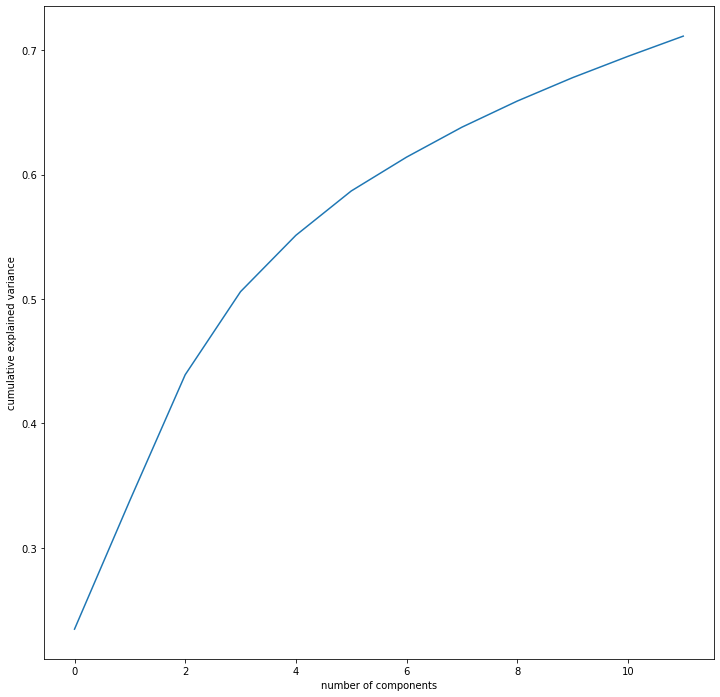

In [7]:
C=12
pca = PCA(n_components=C).fit(X_train)
plt.figure(1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
X_pca=pca.fit_transform(X_train)

## PCA with 3 components 

(139, 12)


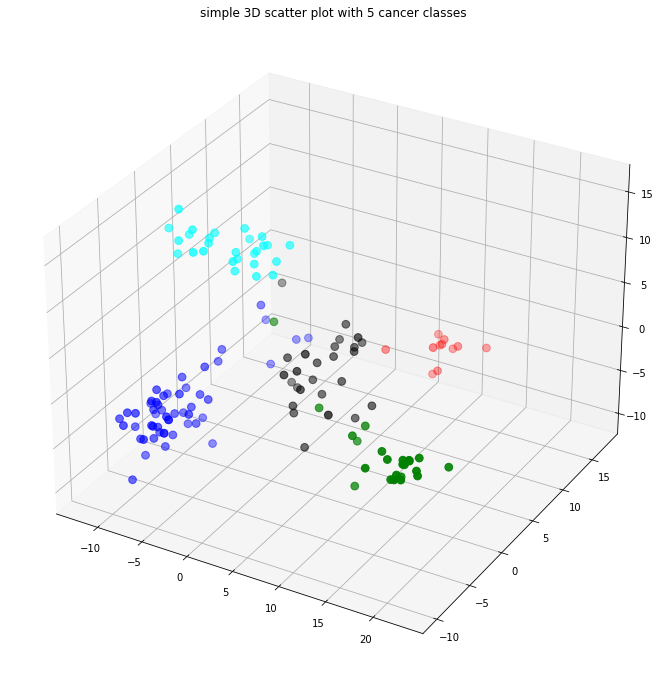

In [8]:
# Creating figure
fig = plt.figure(2)
ax = plt.axes(projection ="3d")
# Creating plot
colores=['blue','red','green','black','cyan']
assigned=[]
for row in Yn_train:
    assigned.append(colores[row])
print(X_pca.shape)
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=assigned,s=60)
plt.title("simple 3D scatter plot with 5 cancer classes")
# show plot
plt.show()

In [9]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
#kmeansCen = [kmeans[i].fit(X_pca) for i in range(len(kmeans))]
score = [kmeans[i].fit(X_pca).score(X_pca) for i in range(len(kmeans))]

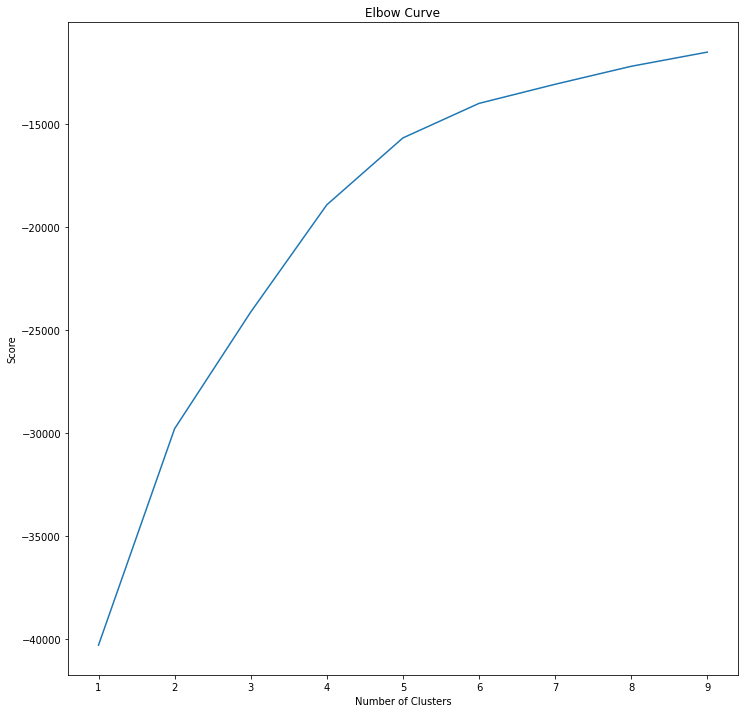

In [10]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

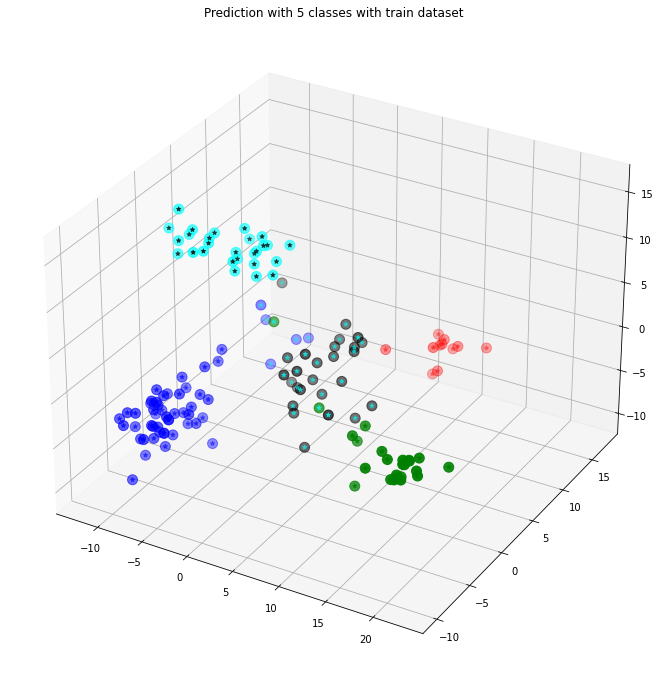

In [11]:
# Predicting the clusters
k_labels = kmeans[4].predict(X_pca)

# Creating figure
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
colores=['blue','red','green','black','cyan','yellow','orange']
predicted=[]
assigned=[]
for row in k_labels:
    predicted.append(colores[row])
for row in Yn_train:
    assigned.append(colores[row])
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], marker='o',c=assigned,s=100)
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], marker='*',c=predicted,s=20)
plt.title("Prediction with 5 classes with train dataset")
 
# show plot
plt.show()

In [12]:
print(Yn_train)
print(k_labels)

[0 4 4 1 4 0 4 2 0 4 1 2 3 2 0 1 3 0 0 4 4 3 2 3 0 3 2 4 3 0 3 0 0 3 2 1 3
 2 0 4 0 0 0 0 0 1 0 4 3 0 3 3 4 0 2 0 0 3 0 4 4 4 0 3 0 3 0 4 2 2 0 0 2 0
 0 0 4 4 3 2 3 4 0 3 0 0 2 2 0 3 1 4 0 0 3 0 2 2 4 0 4 2 3 2 0 4 0 0 4 3 3
 1 3 0 1 0 0 0 3 2 3 1 2 0 4 0 0 4 4 1 0 2 0 1 0 2 4 2 0]
[4 3 3 1 3 0 3 2 0 3 1 2 4 2 4 1 4 0 0 3 3 4 2 4 0 4 2 3 4 0 4 0 0 4 4 1 4
 2 0 3 0 0 0 0 0 1 0 3 4 4 4 4 3 0 2 0 0 4 0 3 3 3 0 4 0 4 0 3 2 2 0 0 2 4
 0 0 3 3 4 2 4 3 0 4 0 0 2 2 0 4 1 3 0 0 4 0 2 2 3 0 3 4 4 2 0 3 0 0 3 4 4
 1 4 0 1 0 0 0 4 2 4 1 2 0 3 0 0 3 3 1 0 2 0 1 0 2 3 2 4]


## Reetiquetamos los datos para realizar la matriz de confusión y ver que tan bien se realizó el agrupamiento con respecto a las secuencias correctas

In [13]:
# Prep
k_labels_matched = np.empty_like(k_labels)
nums = np.unique(Yn_train)
# For each cluster label...
for p in np.unique(k_labels):
    match_nums = [np.sum((k_labels==p)*(Yn_train==t)) for t in nums]
    k_labels_matched[k_labels==p] = nums[np.argmax(match_nums)]

In [14]:
print(Yn_train)
print(k_labels_matched)

[0 4 4 1 4 0 4 2 0 4 1 2 3 2 0 1 3 0 0 4 4 3 2 3 0 3 2 4 3 0 3 0 0 3 2 1 3
 2 0 4 0 0 0 0 0 1 0 4 3 0 3 3 4 0 2 0 0 3 0 4 4 4 0 3 0 3 0 4 2 2 0 0 2 0
 0 0 4 4 3 2 3 4 0 3 0 0 2 2 0 3 1 4 0 0 3 0 2 2 4 0 4 2 3 2 0 4 0 0 4 3 3
 1 3 0 1 0 0 0 3 2 3 1 2 0 4 0 0 4 4 1 0 2 0 1 0 2 4 2 0]
[3 4 4 1 4 0 4 2 0 4 1 2 3 2 3 1 3 0 0 4 4 3 2 3 0 3 2 4 3 0 3 0 0 3 3 1 3
 2 0 4 0 0 0 0 0 1 0 4 3 3 3 3 4 0 2 0 0 3 0 4 4 4 0 3 0 3 0 4 2 2 0 0 2 3
 0 0 4 4 3 2 3 4 0 3 0 0 2 2 0 3 1 4 0 0 3 0 2 2 4 0 4 3 3 2 0 4 0 0 4 3 3
 1 3 0 1 0 0 0 3 2 3 1 2 0 4 0 0 4 4 1 0 2 0 1 0 2 4 2 3]


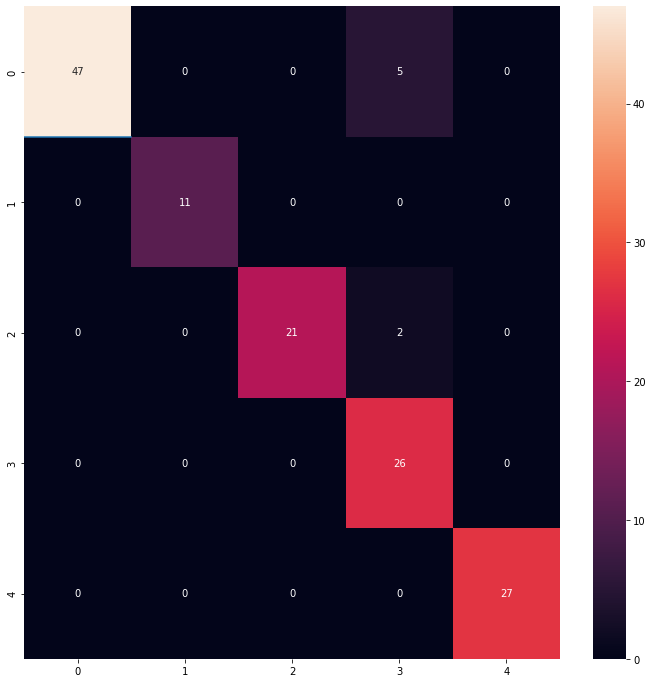

Accuracy : 
 94.96402877697841
Report : 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        52
           1       1.00      1.00      1.00        11
           2       1.00      0.91      0.95        23
           3       0.79      1.00      0.88        26
           4       1.00      1.00      1.00        27

    accuracy                           0.95       139
   macro avg       0.96      0.96      0.96       139
weighted avg       0.96      0.95      0.95       139



In [15]:
cal_accuracy("Kmeans", Yn_train, k_labels_matched)

## Test dataset with kmeans

In [16]:
classes,Yn_test=np.unique(y_test,return_inverse=True)
Xt_pca=pca.transform(X_test)
# Predicting the clusters
kt_labels = kmeans[4].predict(Xt_pca)
print(kt_labels)

[3 4 0 0 0 1 2 1 4 4 0 3 2 0 3 0 3 4 2 0 2 4 0 3 0 2 4 0 2 0 0 1 4 4 0 2 2
 0 4 3 2 4 3 4 3 3 4 4 0 4 2 0 2 3 0 4 3 0 4 3]


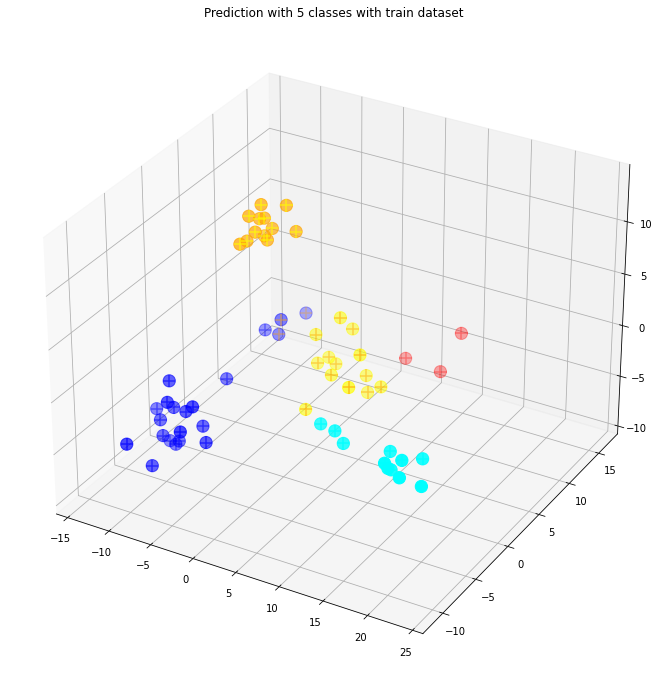

In [17]:
# Creating figure
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
colores=['blue','red','cyan','yellow','orange']
predicted=[]
assigned=[]
for row in kt_labels:
    predicted.append(colores[row])
for row in Yn_test:
    assigned.append(colores[row])
ax.scatter3D(Xt_pca[:, 0], Xt_pca[:, 1], Xt_pca[:, 2], marker='o',c=assigned,s=150)
ax.scatter3D(Xt_pca[:, 0], Xt_pca[:, 1], Xt_pca[:, 2], marker='+',c=predicted,s=150)
plt.title("Prediction with 5 classes with train dataset")
 
# show plot
plt.show()

[18, 0, 0, 0, 0]
[0, 3, 0, 0, 0]
[0, 0, 11, 0, 0]
[0, 0, 0, 0, 12]
[3, 0, 0, 13, 0]
[3 4 0 0 0 1 2 1 4 4 0 3 2 0 3 0 3 4 2 0 2 4 0 3 0 2 4 0 2 0 0 1 4 4 0 2 2
 0 4 3 2 4 3 4 3 3 4 4 0 4 2 0 2 3 0 4 3 0 4 3]
<class 'numpy.ndarray'>
[4 3 0 0 0 1 2 1 3 3 0 4 2 0 4 0 4 3 2 0 2 3 0 4 0 2 3 0 2 0 0 1 3 3 0 2 2
 0 3 4 2 3 4 3 4 4 3 3 0 3 2 0 2 4 0 3 4 0 3 4]


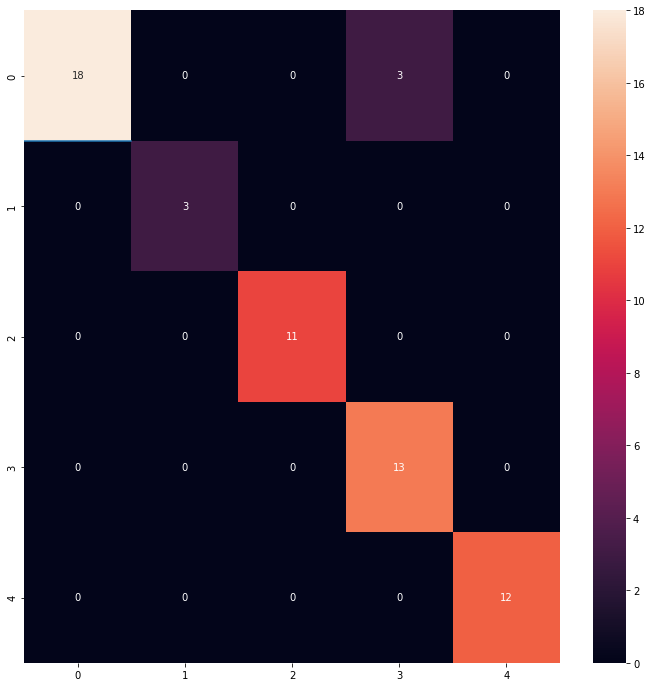

Accuracy : 
 95.0
Report : 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        11
           3       0.81      1.00      0.90        13
           4       1.00      1.00      1.00        12

    accuracy                           0.95        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.96      0.95      0.95        60



In [22]:
# Prep
kt_labels_matched = np.empty_like(kt_labels)
nums = np.unique(Yn_test)
# For each cluster label...
for p in np.unique(k_labels):
    match_nums = [np.sum((kt_labels==p)*(Yn_test==t)) for t in nums]
    print(match_nums)
    kt_labels_matched[kt_labels==p] = nums[np.argmax(match_nums)]
print(kt_labels)
print(Yn_test)
print(kt_labels_matched)
cal_accuracy("KmeansTest", Yn_test, kt_labels_matched)

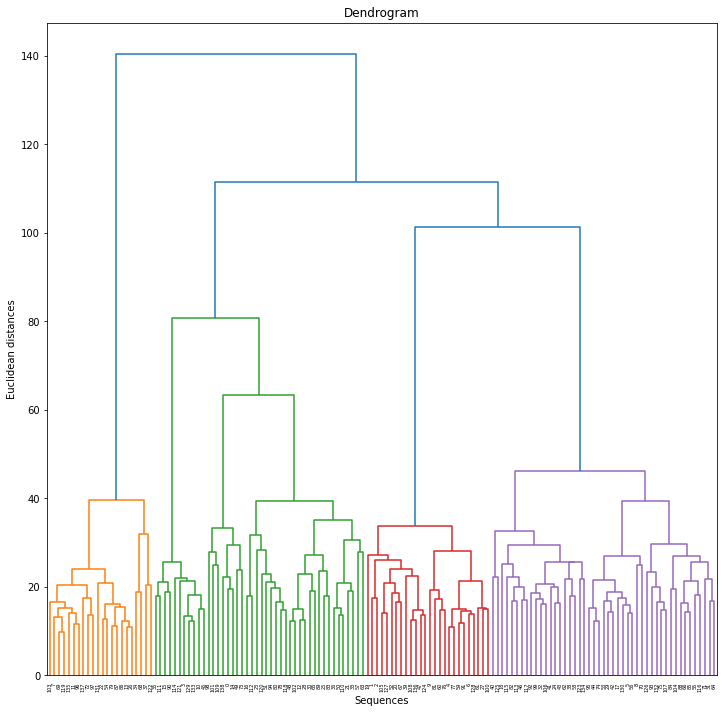

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Sequences')
plt.ylabel('Euclidean distances')
plt.show()

In [20]:
# Save fuction
#import pickle
#pickle.dump(kMeans, open("kmeans.pkl", 'wb'))